# Spam Detection in Emails

In [34]:
import numpy as np
import pandas as pd
import os
from collections import Counter
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
with open('train-mails/3-1msg1.txt') as m:
    for i, line in enumerate(m):
        print(i)
    #Line 0 is subject
    #Line 1 is blank
    #Line 2 is email body

0
1
2


In [36]:
#Function to get the most common 3000 words from the test emails to create a dictionary!

def makeDict(train_direct):
    emails = [os.path.join(train_direct , f) for f in os.listdir(train_direct)]
    word_list = []
    
    for mail in emails:
        with open(mail) as m:
            for i, line in enumerate(m):
                # i is the no. of lines
                if i ==2:
                    #Getting to the third line
                    words = line.split()
                    word_list += words
    dict_word = Counter(word_list)
    
    words_keys = list(dict_word.keys())
    
    for item in words_keys:
        if item.isalpha() == False:
            del dict_word[item]
            
        elif len(item) ==1:
            del dict_word[item]
    
    dict_word = dict_word.most_common(3000)
    
    return dict_word
    

In [37]:
#train_dict = makeDict('C:\\Users\\mamoo\\Desktop\\Python_Coding\\Spam Detection\\train-mails')

In [38]:
# len(train_dict)
# train_dict[3]

In [39]:
def feature_extract(data_dir):
    file_train = [os.path.join(data_dir, i) for i in os.listdir(data_dir)]
    
    feature_matrix = np.zeros((len(file_train), 3000))
    
    docID = 0
    for i in file_train:
        with open(i) as i:
            for j, line in enumerate(i):
                if j == 2:
                    words = line.split()
                    for word in words:
                        wordID = 0
                        for k, d in enumerate(train_dict):
                            if d[0] == word:
                                wordID = k
                                feature_matrix[docID, wordID] = words.count(word)
            docID += 1
    return feature_matrix

In [10]:
# First, we'll create a dictionary of all the words in the dictionary

train_words= 'train-mails'

train_dict = makeDict(train_words)

train_labels = np.zeros(702)

#The bottom half are spam emails, so we assign a label 1 to that!
train_labels[351:701] = 1

train_matrix = feature_extract(train_words)
#Train Matrix Contains the training emails in one-hot encoding!

In [41]:
train_matrix.shape
# 702 Training Emails and 3000 words!


(702, 3000)

In [18]:
# We'll train 3 different models & Compare their results!

M1= MultinomialNB().fit(train_matrix, train_labels)
M2 = LinearSVC().fit(train_matrix, train_labels)
M3 = BernoulliNB().fit(train_matrix, train_labels)

In [19]:
#Testing the Classifiers

test_dir = 'test-mails'
test_matrix = feature_extract(test_dir)
test_labels = np.zeros(260)
test_labels[130:260] = 1

r1 = M1.predict(test_matrix)

### Multinomial Naive Bayes

Accuracy for Multinomial NB Classifier is:  0.9615384615384616


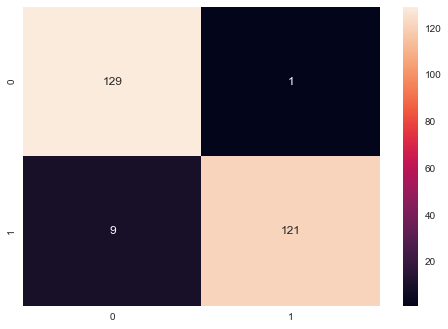

In [23]:
r1 = M1.predict(test_matrix)
cm_r1 = confusion_matrix(test_labels, r1)
acc_r1 = accuracy_score(test_labels, r1)

print("Accuracy for Multinomial NB Classifier is: ", acc_r1)
sns.heatmap(cm_r1, annot= True, fmt ='d')
plt.show()
#print(M1.predict(test_matrix))

In [29]:
print(classification_report(test_labels, r1))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       130
         1.0       0.99      0.93      0.96       130

    accuracy                           0.96       260
   macro avg       0.96      0.96      0.96       260
weighted avg       0.96      0.96      0.96       260



### Linear SVM

Accuracy for Linear SVM Classifier is:  0.9615384615384616


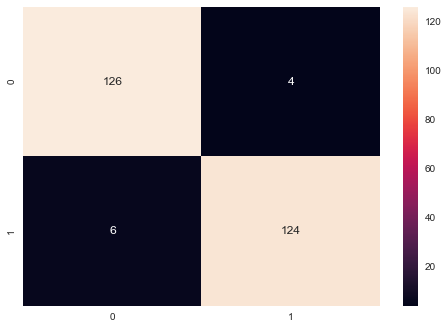

In [31]:
r2 = M2.predict(test_matrix)
cm_r2 = confusion_matrix(test_labels, r2)
acc_r2 = accuracy_score(test_labels, r2)

print("Accuracy for Linear SVM Classifier is: ", acc_r2)
sns.heatmap(cm_r2, annot= True, fmt ='d')
plt.show()

### Binomial Naive Bayes

Accuracy for Binomial NB Classifier is:  0.7692307692307693


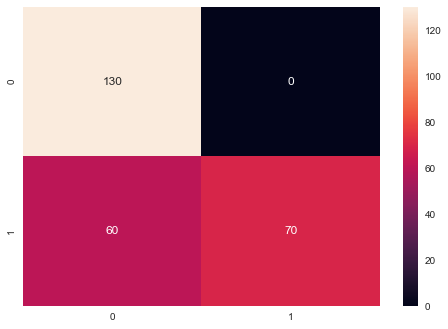

In [32]:
r3 = M3.predict(test_matrix)
cm_r3 = confusion_matrix(test_labels, r3)
acc_r3 = accuracy_score(test_labels, r3)

print("Accuracy for Binomial NB Classifier is: ", acc_r3)
sns.heatmap(cm_r3, annot= True, fmt ='d')
plt.show()
#print(M1.predict(test_matrix))

In [33]:
# Binomial NB Performs poorly as compared to the other two!